In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import display
import pandas as pd
import seaborn.apionly as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Enable inline plotting  
%matplotlib inline

In [3]:
data1 = 'df7-comm-updated-rmsd-traj-split-GA.csv'
data2 = 'df7-comm-updated-rmsd-traj-split.csv'

In [4]:
df7_1 = pd.read_csv(data1)
df7_2 = pd.read_csv(data2)

# Fig 5(b)

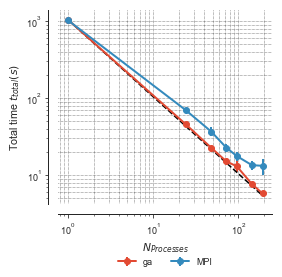

In [6]:
plt.style.use('ggplot')
sns.set_style('ticks')
plt.rcParams['font.size'] = 9
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

df = [df7_1, df7_2]

df[0].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label='ga')
df[1].plot(y='t_tot_max', x='blocks', yerr='std_tot_max', ax=ax, marker='o', lw=2, label='MPI')

ax.set_xlabel('$N_{Processes}$')    
ax.set_ylabel('Total time $t_{total}(s)$')

ax.loglog([1, 192], [df[0]['t_tot_max'][0], df[0]['t_tot_max'][0]/192.], '--',color='black')
plt.yscale('log')
plt.xscale('log')   

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')       
#     plt.legend(loc='upper right')
ax.legend().set_visible(False)

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.23), frameon=False,fancybox=True, shadow=True, ncol=3)
plt.tight_layout() 
fig_name = 'Comparison_tot_time_traj_splitting'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

# Fig 5(c)

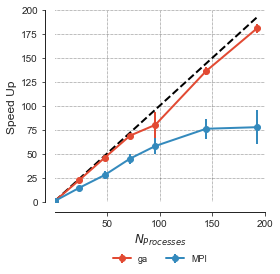

In [8]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 9
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

df = [df7_1, df7_2]
labels = ['ga','MPI']

df[0].plot(y='speed_up', x='blocks', yerr='std_S', ax=ax, marker='o', lw=2, label='ga')
df[1].plot(y='speed_up', x='blocks', yerr='std_S', ax=ax, marker='o', lw=2, label='MPI')
df[1].plot(y='Ideal_Scaling', x='blocks', ax=ax, linestyle='--', color='k', lw=2, label='')

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel('Speed Up')
ax.set_xlim(1, 200)
ax.set_ylim(0, 200)
sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.23), frameon=False,fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Comparison_Speed_UP_with_and_without_IO'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')